In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/Othercomputers/Il mio laptop/Global-Convergence-in-RL

Mounted at /content/drive
/content/drive/Othercomputers/Il mio laptop/RL


In [19]:
from RL_cliff.actions import *
from RL_cliff.environment import *
from RL_cliff.plot import plot_steps, plot_rewards
from RL_cliff.learning_algorithm import discrete_policy_gradient, discrete_SCRN
import pickle
from multiprocessing import Pool

import numpy as np
# import modules
from matplotlib import pyplot as plt

In [20]:
Total_Instances = 16
numthread = 16
Instances_per_Thread = int(Total_Instances/numthread)
num_episodes = 10000

run_algorithms = {
    "Discrete policy gradient",
}


def run_algs(ProcID):
    out_thread = []
    np.random.seed(ProcID)

    class sim_init:
        def __init__(self, num_episodes, gamma, alpha, epsilon, SGD, period):
            self.num_episodes = num_episodes  # Number of training episodes
            self.gamma = gamma  # Discount rate γ 0.9
            self.alpha = alpha  # Learning rate α 0.001
            self.epsilon = epsilon  # Exploration rate ε
            self.SGD = SGD
            self.l = 10
            self.rho = 30
            self.eps = 10**-3
            self.c_ = 1
            self.T_eps = 10
            self.batch_size = 1
            self.period = period

    class sim_output:
        def __init__(self, rewards_cache, step_cache, env_cache, name_cache, std_alg_reward, std_alg_step):
            self.reward_cache = rewards_cache  # list of rewards
            self.step_cache = step_cache  # list of steps
            self.env_cache = env_cache  # list of final paths
            self.name_cache = name_cache  # list of algorithm names
            self.std_alg_reward = std_alg_reward
            self.std_alg_step = std_alg_step

        def __str__(self):
            return "# episodes: " + str(self.num_episodes) + "gamma: " + str(self.gamma) \
                + "alpha: " + str(self.alpha) + "epsilon: " + str(self.epsilon)
    
    for i in range(Instances_per_Thread):
        sim_output = sim_output(
            rewards_cache=[], step_cache=[], env_cache=[], name_cache=[], std_alg_reward=[], std_alg_step=[])
        REINFORCE_reward = []
        REINFORCE_step = []
        # Run discrete policy gradient
        if "Discrete policy gradient" in run_algorithms:
            sim_input = sim_init(num_episodes=num_episodes, gamma=0.8, alpha=0.01, epsilon=0, SGD=0, period=4000)
            all_probs, sim_output, temp_goal = discrete_SCRN(sim_input, sim_output)
            DPG_training_output = np.zeros(1)
            DPG_training_output = temp_goal
            if DPG_training_output == 1:
                REINFORCE_step = sim_output.step_cache[0]
                REINFORCE_reward = sim_output.reward_cache[0]

        class sim_output:
            def __init__(self, rewards_cache, step_cache, env_cache, name_cache, std_alg_reward, std_alg_step):
                self.reward_cache = rewards_cache  # list of rewards
                self.step_cache = step_cache  # list of steps
                self.env_cache = env_cache  # list of final paths
                self.name_cache = name_cache  # list of algorithm names
                self.std_alg_reward = std_alg_reward
                self.std_alg_step = std_alg_step

        out_thread.append([REINFORCE_step, REINFORCE_reward, [DPG_training_output]])
    return out_thread

outputs = run_algs(0)

1 : 8.0
2 : 1.0
3 : 5.0
4 : 19.0
5 : 20.0
6 : 63.0
7 : 1.0
8 : 25.0
9 : 61.0
10 : 86.0
11 : 37.0
12 : 12.0
13 : 22.0
14 : 8.0
15 : 25.0
16 : 4.0
17 : 66.0
18 : 34.0
19 : 100.0
20 : 24.0
21 : 4.0
22 : 43.0
23 : 28.0
24 : 34.0
25 : 74.0
26 : 3.0
27 : 42.0
28 : 15.0
29 : 56.0
30 : 28.0
31 : 100.0
32 : 91.0
33 : 33.0
34 : 3.0
35 : 20.0
36 : 76.0
37 : 65.0
38 : 66.0
39 : 3.0
40 : 26.0
41 : 36.0
42 : 24.0
43 : 63.0
44 : 60.0
45 : 30.0
46 : 100.0
47 : 88.0
48 : 100.0
49 : 55.0
50 : 100.0
51 : 39.0
52 : 100.0
53 : 71.0
54 : 68.0
55 : 73.0
56 : 100.0
57 : 21.0
58 : 100.0
59 : 100.0
60 : 57.0
61 : 47.0
62 : 100.0
63 : 100.0
64 : 92.0
65 : 100.0
66 : 70.0
67 : 51.0
68 : 100.0
69 : 100.0
70 : 90.0
71 : 100.0
72 : 100.0
73 : 100.0
74 : 100.0
75 : 100.0
76 : 54.0
77 : 100.0
78 : 100.0
79 : 100.0
80 : 74.0
81 : 100.0
82 : 100.0
83 : 98.0
84 : 100.0
85 : 100.0
86 : 100.0
87 : 100.0
88 : 100.0
89 : 100.0
90 : 100.0
91 : 100.0
92 : 100.0
93 : 17.0
94 : 100.0
95 : 100.0
96 : 100.0
97 : 100.0
98 : 100.0
9

KeyboardInterrupt: ignored

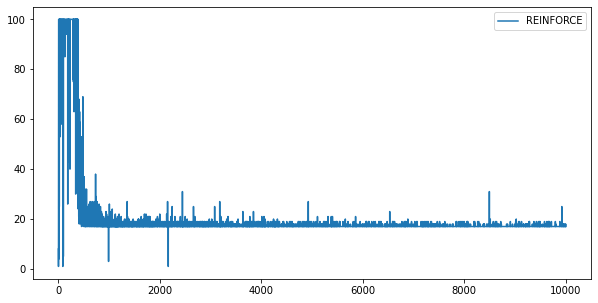

In [17]:
SCRN_episode_lengths = outputs[0][0]
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(np.arange(len(REINFORCE_episode_lengths)), REINFORCE_episode_lengths, label="REINFORCE")
plt.plot(np.arange(len(SCRN_episode_lengths)), SCRN_episode_lengths, label="SCRN")
plt.legend(loc="best")

In [ ]:
pool = Pool()  # Create a multiprocessing Pool
data_inputs = list(range(numthread))
with Pool(numthread) as p:
    out = p.map(run_algs, data_inputs)

print('out:', out)

SGD_step = np.zeros((1, num_episodes))
SCRN_step = np.zeros((1, num_episodes))
REINFORCE_step = np.zeros((1, num_episodes))

SGD_reward = np.zeros((1, num_episodes))
SCRN_reward = np.zeros((1, num_episodes))
REINFORCE_reward = np.zeros((1, num_episodes))

for i in range(len(out)):
    for j in range(len(out[0])):
        # REINFORCE
        if out[i][j][0] != []:
            REINFORCE_step += out[i][j][0]/np.sum(np.sum(np.array(out).reshape(numthread, Instances_per_Thread, 3)[:, :, 2]))
        else:
            REINFORCE_step = REINFORCE_step

        if out[i][j][1] != []:
            REINFORCE_reward += out[i][j][1]/np.sum(np.sum(np.array(out).reshape(numthread, Instances_per_Thread, 3)[:, :, 2]))
        else:
            REINFORCE_reward = REINFORCE_reward

class sim_output:
    def __init__(self, rewards_cache, step_cache, env_cache, name_cache, std_alg_reward, std_alg_step):
        self.reward_cache = rewards_cache  # list of rewards
        self.step_cache = step_cache  # list of steps
        self.env_cache = env_cache  # list of final paths
        self.name_cache = name_cache  # list of algorithm names
        self.std_alg_reward = std_alg_reward
        self.std_alg_step = std_alg_step

out0 = []
out1 = []
for i in range(len(out)):
    for j in range(len(out[0])):
        if out[i][j][0] != []:
            out0.append(out[i][j][0])
        if out[i][j][1] != []:
            out1.append(out[i][j][1])

sim_DPG_output_step_std = np.std(np.array(out0), axis=0)
if out0 == []:
    sim_DPG_output_step_std = np.zeros(num_episodes)
sim_DPG_output_reward_std = np.std(np.array(out1), axis=0)
if out1 == []:
    sim_DPG_output_reward_std = np.zeros(num_episodes)

with open('results/REINFORCE_step.pkl', 'wb') as file:
    pickle.dump(REINFORCE_step[0], file)

with open('results/REINFORCE_reward.pkl', 'wb') as file:
    pickle.dump(REINFORCE_reward[0], file)

with open('results/REINFORCE_step_std.pkl', 'wb') as file:
    pickle.dump(sim_DPG_output_step_std, file)

with open('results/REINFORCE_reward_std.pkl', 'wb') as file:
    pickle.dump(sim_DPG_output_reward_std, file)

# Plot output
sim_out_total = sim_output(
    rewards_cache=[], step_cache=[], env_cache=[], name_cache=[], std_alg_step=[], std_alg_reward=[])
sim_out_total.step_cache.append(REINFORCE_step[0])
sim_out_total.reward_cache.append(REINFORCE_reward[0])
sim_out_total.std_alg_step.append(sim_DPG_output_step_std)
sim_out_total.std_alg_reward.append(sim_DPG_output_reward_std)
sim_out_total.name_cache.append("REINFORCE")

plot_steps(sim_out_total)
plot_rewards(sim_out_total)
print('REINFORCE_true_instances:', np.sum(np.sum(np.array(out).reshape(numthread, Instances_per_Thread, 3)[:, :, 2])))
x = np.zeros(1)
x[0] = np.sum(np.sum(np.array(out).reshape(numthread, Instances_per_Thread, 3)[:, :, 2]))
plt.plot([i for i in range(1)], x, color='red', label="Successful_trajectories")
plt.xlabel('i')
plt.ylabel('true_instances')
plt.grid(True)
plt.legend(loc="upper right")
plt.savefig('results/true_instances_cliff_Reinforce.pdf')